In [80]:
# This Python 3 environment comes with many helpful libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame, Series
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression



#import test dataset
data_test = pd.read_csv('../input/covid-19-nlp-text-classification/Corona_NLP_test.csv')

#remove ScreenName and Location column from dataset
data_test.drop(["ScreenName", "Location"], axis=1, inplace=True)

#convert original tweet datatype to string
data_test["OriginalTweet"] = data_test["OriginalTweet"].astype(str)

#statistical analysis
print(f'Total tweets in test data: {len(data_test["OriginalTweet"])}')
print(f'Total unique users in test data: {len(data_test["UserName"].unique())}')
print(f'Total unique sentiments in test data: {len(data_test["Sentiment"].unique())}')
print(f'Total unique tweet dates in test data: {len(data_test["TweetAt"].unique())}')


#sentiment column selection of unique values for table
data_test["Sentiment"] = pd.Series(data_test["Sentiment"], dtype=str)

negative_count = 0
positive_count = 0
neutral_count = 0

for i in range(len(data_test["Sentiment"])):
    if data_test["Sentiment"][i] == "Extremely Negative" or data_test["Sentiment"][i] == "Negative":
        negative_count = negative_count + 1
        
    elif data_test["Sentiment"][i] == "Extremely Positive" or data_test["Sentiment"][i] == "Positive":
        positive_count = positive_count + 1
        
    else:
        neutral_count = neutral_count + 1

#creating new dataframe for sentimental statistical representation
test_sentiment_analysis = {"comments": [positive_count, neutral_count, negative_count],
                      "sentiment": ["Positive", "Neutral", "Negative"]}
sentiment_analysis_df = DataFrame(test_sentiment_analysis)
print(sentiment_analysis_df)

      
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Total tweets in test data: 3798
Total unique users in test data: 3798
Total unique sentiments in test data: 5
Total unique tweet dates in test data: 15
   comments sentiment
0      1546  Positive
1       619   Neutral
2      1633  Negative
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


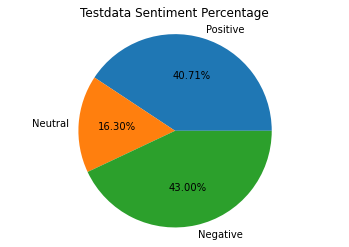

In [81]:
#plotting piechart to show statistical analysis on sentiment
plt.pie(test_sentiment_analysis["comments"], labels=test_sentiment_analysis["sentiment"], radius=1.5, autopct='%0.2f%%')
plt.axis("equal")
plt.title("Testdata Sentiment Percentage")
plt.show()

In [82]:
#import train dataset
data_train = pd.read_csv('../input/covid-19-nlp-text-classification/Corona_NLP_train.csv',encoding='latin1')


#remove ScreenName and Location column from dataset
data_train.drop(["ScreenName", "Location"], axis=1, inplace=True)

#handle duplicated data
data_train.sort_values("UserName", inplace = True)
data_train.drop_duplicates(subset="UserName", keep = False, inplace = True)

#replace values of username to match serially
for i in range(len(data_train["UserName"])):
    data_train["UserName"].replace({data_train["UserName"][i]:(i+1)}, inplace = True)

#statistical analysis
print(f'Total tweets in train data: {len(data_train["OriginalTweet"])}')
print(f'Total unique users in train data: {len(data_train["UserName"].unique())}')
print(f'Total unique sentiments in train data: {len(data_train["Sentiment"].unique())}')
print(f'Total unique tweet dates in train data: {len(data_train["TweetAt"].unique())}')


train_negative_count = 0
train_positive_count = 0
train_neutral_count = 0

for i in range(len(data_train["Sentiment"])):
    if data_train["Sentiment"][i] == "Extremely Negative" or data_train["Sentiment"][i] == "Negative":
        train_negative_count = train_negative_count + 1
        
    elif data_train["Sentiment"][i] == "Extremely Positive" or data_train["Sentiment"][i] == "Positive":
        train_positive_count = train_positive_count + 1
        
    else:
        train_neutral_count = train_neutral_count + 1
        
        
#creating new dataframe for sentimental statistical representation
train_sentiment_analysis = {"comments": [train_positive_count, train_neutral_count, train_negative_count],
                      "sentiment": ["Positive", "Neutral", "Negative"]}
sentiment_analysis_df = DataFrame(train_sentiment_analysis)
print(sentiment_analysis_df)


Total tweets in train data: 41157
Total unique users in train data: 41157
Total unique sentiments in train data: 5
Total unique tweet dates in train data: 30
   comments sentiment
0     18046  Positive
1      7713   Neutral
2     15398  Negative


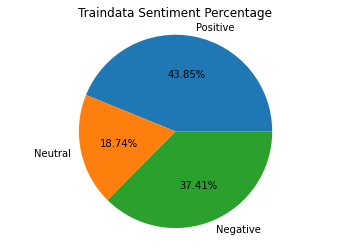

In [83]:
#plotting piechart to show statistical analysis on sentiment
plt.pie(train_sentiment_analysis["comments"], labels=train_sentiment_analysis["sentiment"], radius=1.5, autopct='%0.2f%%')
plt.axis("equal")
plt.title("Traindata Sentiment Percentage")
plt.show()

In [84]:
#statistical analysis for time of tweet of train dataset
train_date_frequency = data_train.groupby("TweetAt").count()

#add new column for number of tweets date had
train_date_frequency["Frequency"] = train_date_frequency["UserName"]
train_date_frequency["Index"] = np.nan


#fill index column with indices
for i in range(len(train_date_frequency["Index"])):
    train_date_frequency["Index"][i] = (i)
train_date_frequency["Index"] = pd.Series(train_date_frequency["Index"], dtype=int)


#drop old columns
train_date_frequency.drop(["UserName", "OriginalTweet", "Sentiment"], axis = 1, inplace = True)

print(train_date_frequency)


            Frequency  Index
TweetAt                     
01-04-2020        630      0
02-04-2020        954      1
03-04-2020        810      2
04-04-2020        767      3
05-04-2020       1131      4
06-04-2020       1742      5
07-04-2020       1843      6
08-04-2020       1881      7
09-04-2020       1471      8
10-04-2020       1005      9
11-04-2020        909     10
12-04-2020        803     11
13-04-2020       1428     12
14-04-2020        284     13
16-03-2020        656     14
17-03-2020       1977     15
18-03-2020       2742     16
19-03-2020       3215     17
20-03-2020       3448     18
21-03-2020       2653     19
22-03-2020       2114     20
23-03-2020       2062     21
24-03-2020       1480     22
25-03-2020       2979     23
26-03-2020       1277     24
27-03-2020        345     25
28-03-2020         23     26
29-03-2020        125     27
30-03-2020         87     28
31-03-2020        316     29


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


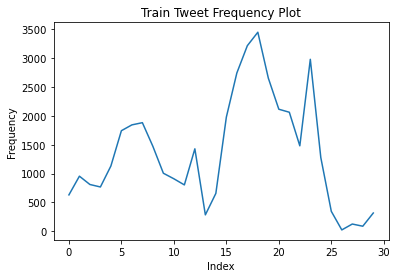

In [85]:
#plot histogram to show relationship between time of tweet and frequency
plt.plot(train_date_frequency["Index"], train_date_frequency["Frequency"])
plt.title("Train Tweet Frequency Plot")
plt.xlabel("Index")
plt.ylabel("Frequency")
plt.show()

In [86]:
#statistical analysis for time of tweet of test dataset
test_date_frequency = data_test.groupby("TweetAt").count()

#add new column for number of tweets date had
test_date_frequency["Frequency"] = test_date_frequency["UserName"]
test_date_frequency["Index"] = np.nan


#fill index column with indices
for i in range(len(test_date_frequency["Index"])):
    test_date_frequency["Index"][i] = (i)
test_date_frequency["Index"] = pd.Series(test_date_frequency["Index"], dtype=int)


#drop old columns
test_date_frequency.drop(["UserName", "OriginalTweet", "Sentiment"], axis = 1, inplace = True)

print(test_date_frequency)

            Frequency  Index
TweetAt                     
02-03-2020          4      0
03-03-2020          4      1
04-03-2020          8      2
05-03-2020          6      3
06-03-2020          2      4
07-03-2020          7      5
08-03-2020          9      6
09-03-2020         16      7
10-03-2020         54      8
11-03-2020        165      9
12-03-2020        685     10
13-03-2020       1233     11
14-03-2020        614     12
15-03-2020        519     13
16-03-2020        472     14


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


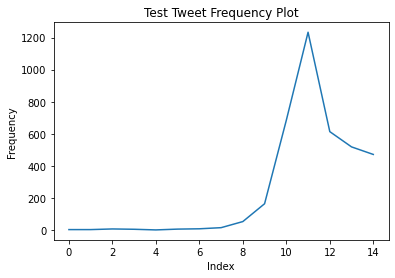

In [87]:
#plot histogram to show relationship between time of tweet and frequency
plt.plot(test_date_frequency["Index"], test_date_frequency["Frequency"])
plt.title("Test Tweet Frequency Plot")
plt.xlabel("Index")
plt.ylabel("Frequency")
plt.show()

In [88]:
from sklearn.model_selection import train_test_split

#Prediction Model
#predict number of tweet on days

#merge dataset
df = pd.concat([train_date_frequency, test_date_frequency])
        
#remove duplicating data
df.drop(["16-03-2020"], axis=0, inplace = True)

#change values of Index column
for i in range(len(df["Index"])):
    df["Index"][i] = (i)
    
#creating tweet time column
time = []
df["TweetTime"] = "null"
for index, row in df.head(n=len(df["Index"])).iterrows():
     time.append(index)
        

for i in range(len(df["Index"])):
    df["TweetTime"][i] = time[i]

#one hot code representation for tweet time
df["Repr"] = 0
for i in range(len(df["Index"])):
    df["Repr"][i] = i+1

#set train and test dataframes
train = df.drop(["Frequency", "TweetTime"], axis=1)
test = df["Frequency"]

#spliting dataset
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.5, random_state = 2)

#prediction
regr = LinearRegression()
regr.fit(x_train, y_train)
pred = regr.predict(x_test)
print(df)
print(pred)



            Frequency  Index   TweetTime  Repr
TweetAt                                       
01-04-2020        630      0  01-04-2020     1
02-04-2020        954      1  02-04-2020     2
03-04-2020        810      2  03-04-2020     3
04-04-2020        767      3  04-04-2020     4
05-04-2020       1131      4  05-04-2020     5
06-04-2020       1742      5  06-04-2020     6
07-04-2020       1843      6  07-04-2020     7
08-04-2020       1881      7  08-04-2020     8
09-04-2020       1471      8  09-04-2020     9
10-04-2020       1005      9  10-04-2020    10
11-04-2020        909     10  11-04-2020    11
12-04-2020        803     11  12-04-2020    12
13-04-2020       1428     12  13-04-2020    13
14-04-2020        284     13  14-04-2020    14
17-03-2020       1977     14  17-03-2020    15
18-03-2020       2742     15  18-03-2020    16
19-03-2020       3215     16  19-03-2020    17
20-03-2020       3448     17  20-03-2020    18
21-03-2020       2653     18  21-03-2020    19
22-03-2020   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
